## <center>Fandango's rating system </center>

<center> A data journalist by the name of Walt Hickey examined movie ratings data in October 2015 and discovered compelling evidence that Fandango's (an online movie ratings aggregator) rating methodology was unfair and prejudiced. His study was published [in this text](https://fivethirtyeight.com/features/fandango-movies-ratings/), which is a fantastic example of data journalism and is well worth reading.</center>

<center>In this project, we'll examine more recent movie ratings data to see if Hickey's analysis has had any impact on Fandango's rating methodology.</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fandango = pd.read_csv('fandango_score_comparison.csv')
movie_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango_before = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = movie_16_17[['movie', 'year', 'fandango']].copy()


<b>fandango_score_comparison.csv</b> contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

<b>movie_ratings_16_17.csv</b> contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

# Changing the Goal of our Analysis


We now have the option of gathering fresh data or changing the aim of our investigation. We choose for the latter and set some restrictions on our initial objective.

Our new objective is to ascertain whether there is a difference between Fandango's popular movie ratings from 2015 and 2016 rather than attempting to determine whether Fandango's rating system has changed in response to Hickey's analysis. This new objective ought to serve as a decent stand-in for our original objective.

# Isolating the Samples We Need

We are interested in two populations for this new study goal:


 1.All of Fandango's reviews of well-liked films that were released in 2015.<br>
 2.All of Fandango's assessments of well-liked films released in 2016.<br>
It's important to define what constitutes a popular movie. Using Hickey's threshold of 30 fan ratings, we will only classify a movie as popular if it has <br>30 or more fan ratings</br> on the Fandango website.

Although movie popularity is one of the sampling criteria in our second sample, the sample doesn't provide data on the number of fan ratings. We should be skeptics once more and question whether this sample contains popular movies <b?<b>movies with over 30 fan ratings</b> and is actually representative.

You may quickly determine whether this sample is representative by choosing ten films at random, counting the number of fan ratings on the Fandango website, and then comparing the results. Ideally, at least 8 of the 10 films have 30 or more fan ratings.

In [4]:
fandango_before['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

Our result showss that the entire list is considered "popular" since the minimum value is 35 votes.

The lack of information regarding the amount of fan ratings in one of the data sets raises concerns about representativity once more. We quickly determine whether this sample comprises enough well-known films to be considered representative. To filter 'popular' movies, we add the "audience" category back in order to do this.

In [5]:
# Add back the "audience" column to filter 'popular' movies
fandango_after = movie_16_17[['movie', 'year', 'fandango', 'audience']].copy()

#Filter for popular movies
movie_ratings_pop = fandango_after[fandango_after.audience >= 30]
movie_ratings_pop['audience'].describe()


count    191.000000
mean      63.125654
std       17.529371
min       30.000000
25%       49.000000
50%       64.000000
75%       79.000000
max       93.000000
Name: audience, dtype: float64

In [6]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


Looking at the '<b>FILM</b>' column we can observe a year in which movie was filmed next to its title. <br>
<br>
    &#9679; We strip the year and add it as a new column.<br>
    &#9679; Isolate the movies released in 2015 in a separate data set. <br>
    &#9679; Isolate the movies released in 2016 in separate data set.<br>

In [7]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1].astype(int)
fandango_before.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
16,Ted 2 (2015),4.5,4.1,6437,0.4,2015
20,"McFarland, USA (2015)",5.0,4.6,3364,0.4,2015
72,American Sniper (2015),5.0,4.8,34085,0.2,2015
63,Child 44 (2015),4.0,3.7,308,0.3,2015
39,Maps to the Stars (2015),3.5,3.1,35,0.4,2015


In [8]:
#Isolating movies from 2015
movies_2015 = fandango_before[fandango_before['Year'] == 2015]

#Isolating movies from 2016
movies_2016 = movie_ratings_pop[movie_ratings_pop.year == 2016]

print("popular_movies_2015", movies_2015.shape)
print("popular_movies_2016", movies_2016.shape)



popular_movies_2015 (129, 6)
popular_movies_2016 (172, 4)


In [9]:
movies_2015.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
91,Paddington (2015),4.5,4.3,4045,0.2,2015
118,Infinitely Polar Bear (2015),4.0,3.9,124,0.1,2015
110,Escobar: Paradise Lost (2015),4.0,3.9,48,0.1,2015
41,Timbuktu (2015),4.0,3.6,74,0.4,2015
84,Sinister 2 (2015),3.5,3.3,973,0.2,2015


In [10]:
movies_2016.sample(5)

,movie,year,fandango,audience
187,The Magnificent Seven,2016,4.5,73
149,Star Trek Beyond,2016,4.5,81
173,The Edge of Seventeen,2016,4.0,84
152,Sully,2016,4.5,85
12,Arrival,2016,4.0,82


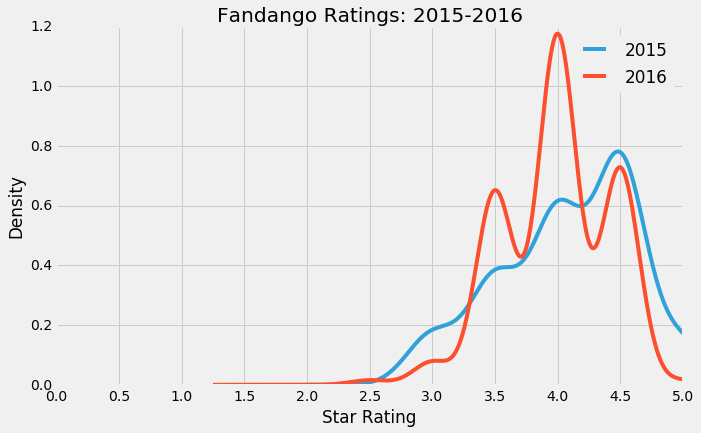

In [25]:
%matplotlib inline

plt.style.use('fivethirtyeight')

movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (10,6))
movies_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Fandango Ratings: 2015-2016')
plt.xlabel('Star Rating')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

From graph above, we can observe two things:<br>
<br>
    &#9679; The shape of the 2015 distribution is left skewed<br>
    &#9679; The shape of the 2016 distribution is also left skewed but it has
            lower ratings <br>
<br>
This indicates that following Hickey's investigation, Fandango's rating methodology for well-liked films has changed. In comparison to 2015, movie ratings in 2016 are lower.




# Comparing Relative Frequencies

Since the two samples has a different number of movies(<b>129 movies in 2015 and 172 movies 2016</b>), it will be more effcient to compare relative frequencies between those two.

In [30]:
movies_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [31]:
movies_2016['fandango'].value_counts(normalize=True).sort_index() *100

2.5     0.581395
3.0     2.906977
3.5    24.418605
4.0    44.186047
4.5    27.325581
5.0     0.581395
Name: fandango, dtype: float64

We now have a clearer picture because there were 10% fewer 4.5 and 6.4% less 5 star reviews in 2016 than there were in 2015.<br>

Determining the Direction of Change We'll take a couple of summary statistics to get a more precise picture about the direction of the difference.





In [44]:
# Calculate mean, median, and mode for 2015 and 2016

mean_2015 = movies_2015['Fandango_Stars'].mean()
mean_2016 = movies_2016['fandango'].mean()
mode_2015 = movies_2015['Fandango_Stars'].mode()[0]
mode_2016 = movies_2016['fandango'].mode()[0]
median_2015 = movies_2015['Fandango_Stars'].median()
median_2016 = movies_2016['fandango'].median()

In [45]:
# Create a dataframe

summary_stat = pd.DataFrame()
summary_stat['2015'] = [mean_2015, median_2015, mode_2015]
summary_stat['2016'] = [mean_2016, median_2016, mode_2016]
summary_stat.index = ['mean', 'median', 'mode']
summary_stat

,2015,2016
mean,4.085271,3.982558
median,4.000000,4.000000
mode,4.500000,4.000000


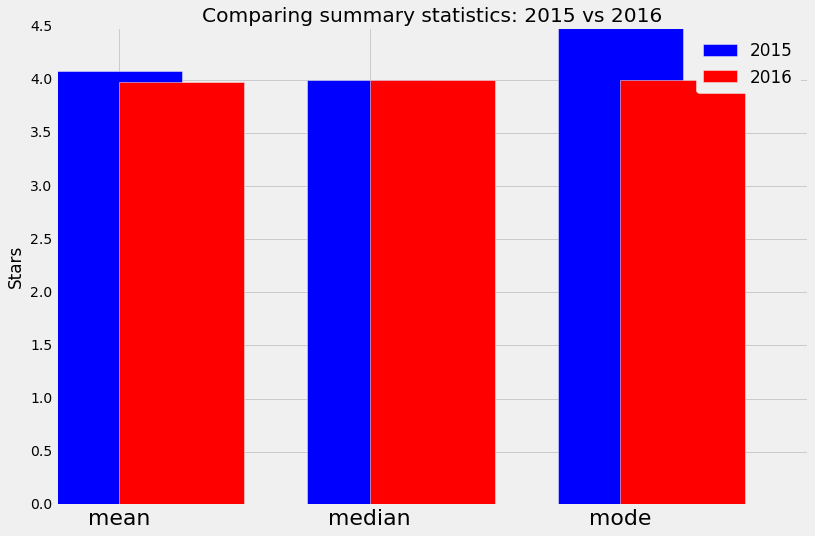

In [52]:
plt.style.use('fivethirtyeight')
summary_stat['2015'].plot.bar(color='blue', align='center', label = '2015', figsize=(12, 8), rot='90')
summary_stat['2016'].plot.bar(color='red', align='edge', label = '2016')
plt.ylabel('Stars')
plt.xticks(rotation=0, fontsize=22)
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.legend()
plt.show()

#Con